# Project: Investigating a Dataset from The Movie Database (TMDb)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

>I Will be working on the data set that contains information about 10,000 movies collected from The Movie Database (TMDb),including user ratings and revenue just to mention a few.The final two columns ending with “_adj” show the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time. 

> I will be evalauting the effect of movie popularity against revenue and if the cast or movie director also influence movie polularity.
>I also will be exploring the budget of the movie and the revenues, comparing factors that affects revenue either positively or negatively. 

> I will be evalauting the relationship between the genres using count and determine the genre with highest count. which genre brings more revenue, is popularity also a factor to consider here? Those are some of the question and more that will be explored from the data set. 


In [168]:
# Below are codes used to set up import statements for all of the packages that i used
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [169]:
# read in my data set that  have copied to the same folder of my jupyter notebook and  Perform operations to inspect data

df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [170]:
#Looking at the shape, this gives the the sum of the rows and column
df.shape

(10866, 21)

In [171]:
#Looking at some statistics from the dataset such as mean, std, count and percentages
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


This give an overview of some of the details and that are useful to note in the dataset. From here we can see that popularity affects revenue, the higher the popularity of the movie, the more the revnue generated. it is aswell safe to say popularuty if movie affects the revenue generated. 

In [172]:
# To know the number of non null values, i use the following;
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

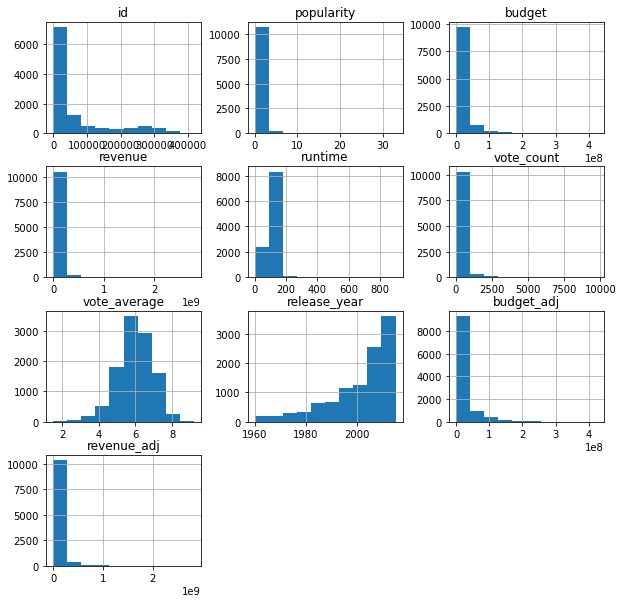

In [173]:
df.hist(figsize=(10,10));

In [174]:
#To check for duplicates, the following function was used, it returned the answer
df.duplicated()
sum(df.duplicated())

1

In [175]:
duplicate = df[df.duplicated()]
print("Duplicate Rows :")
duplicate

Duplicate Rows :


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0



### Data Cleaning (Dropping Duplictes and using men to fill null values)

In [176]:
# Dropping the duplicate that was noticed above
df.drop_duplicates(inplace=True)
# to confrim that the duplicate has been resolved, the following was used;
sum(df.duplicated())

0

In [177]:
#Using mean to fill all none value
df.fillna(df.mean(), inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10865 non-null  int64  
 1   imdb_id               10855 non-null  object 
 2   popularity            10865 non-null  float64
 3   budget                10865 non-null  int64  
 4   revenue               10865 non-null  int64  
 5   original_title        10865 non-null  object 
 6   cast                  10789 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10821 non-null  object 
 9   tagline               8041 non-null   object 
 10  keywords              9372 non-null   object 
 11  overview              10861 non-null  object 
 12  runtime               10865 non-null  int64  
 13  genres                10842 non-null  object 
 14  production_companies  9835 non-null   object 
 15  release_date       

C:\Users\User\AppData\Local\Temp\ipykernel_7588\913146634.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.fillna(df.mean(), inplace=True)


In [178]:
#Converting popularity and vote average columns from float to integer
cols = ['popularity', 'vote_average']
df[cols] = df[cols].applymap(np.int64)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10865 non-null  int64  
 1   imdb_id               10855 non-null  object 
 2   popularity            10865 non-null  int64  
 3   budget                10865 non-null  int64  
 4   revenue               10865 non-null  int64  
 5   original_title        10865 non-null  object 
 6   cast                  10789 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10821 non-null  object 
 9   tagline               8041 non-null   object 
 10  keywords              9372 non-null   object 
 11  overview              10861 non-null  object 
 12  runtime               10865 non-null  int64  
 13  genres                10842 non-null  object 
 14  production_companies  9835 non-null   object 
 15  release_date       

In [179]:
# Dropping colums that will not be used for a cleaner and consise data.
df.drop(['id', 'imdb_id', 'original_title', 'homepage', 'tagline', 'keywords', 'overview', 'runtime', 'production_companies'], axis = 1, inplace = True)
df.head()

,popularity,budget,revenue,cast,director,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32,150000000,1513528810,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6,2015,1.379999e+08,1.392446e+09
1,28,150000000,378436354,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7,2015,1.379999e+08,3.481613e+08
2,13,110000000,295238201,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,Adventure|Science Fiction|Thriller,3/18/15,2480,6,2015,1.012000e+08,2.716190e+08
3,11,200000000,2068178225,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7,2015,1.839999e+08,1.902723e+09
4,9,190000000,1506249360,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Action|Crime|Thriller,4/1/15,2947,7,2015,1.747999e+08,1.385749e+09


In [180]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   popularity    10865 non-null  int64  
 1   budget        10865 non-null  int64  
 2   revenue       10865 non-null  int64  
 3   cast          10789 non-null  object 
 4   director      10821 non-null  object 
 5   genres        10842 non-null  object 
 6   release_date  10865 non-null  object 
 7   vote_count    10865 non-null  int64  
 8   vote_average  10865 non-null  int64  
 9   release_year  10865 non-null  int64  
 10  budget_adj    10865 non-null  float64
 11  revenue_adj   10865 non-null  float64
dtypes: float64(2), int64(6), object(4)
memory usage: 1.1+ MB


<a id='eda'></a>
## Exploratory Data Analysis

### Understanding the relationship between the genres using count

In [181]:
# To get count for each genre and determine which generehas more count in each movie,each genre was splitted and count of each genre was made. 
genres_count = df.genres.str.split('|').explode()
genres_count . value_counts()

Drama              4760
Comedy             3793
Thriller           2907
Action             2384
Romance            1712
Horror             1637
Adventure          1471
Crime              1354
Family             1231
Science Fiction    1229
Fantasy             916
Mystery             810
Animation           699
Documentary         520
Music               408
History             334
War                 270
Foreign             188
TV Movie            167
Western             165
Name: genres, dtype: int64

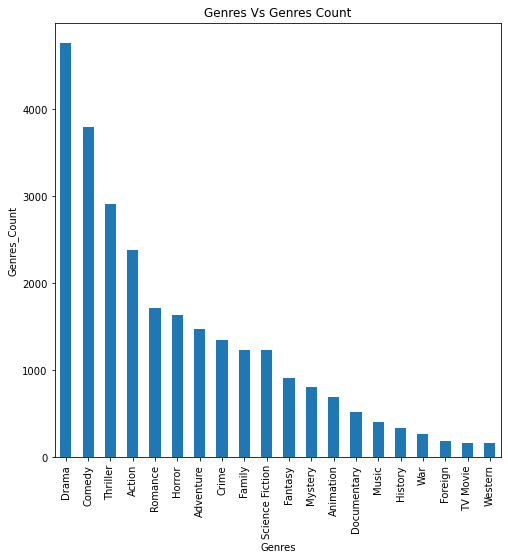

In [182]:
genres_count . value_counts().plot(kind='bar', title='Genres Vs Genres Count', figsize=(8,8))
plt.xlabel('Genres')
plt.ylabel('Genres_Count')
plt.show();

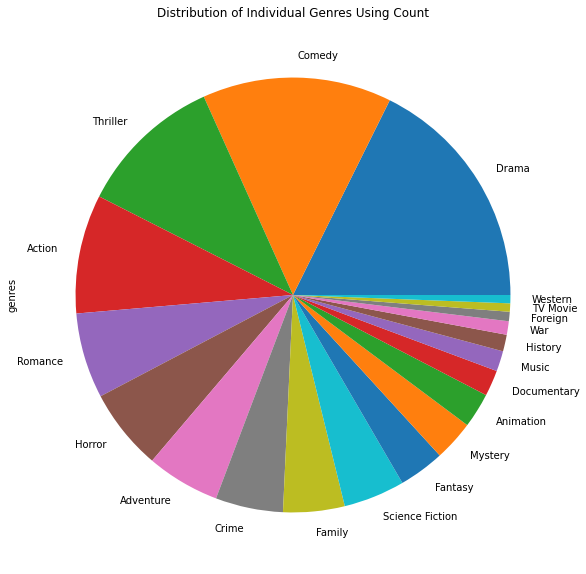

In [183]:
genres_count . value_counts().plot(kind='pie', title='Distribution of Individual Genres Using Count', figsize=(10,10));
plt.show()

From the above result of Genres count, it is seen and observed that the Drama is more in the genres group and has the highest count. it shows that we have more movies that have drama and also shows that more drama movies are in the market than any other movies. From the pie chart, it is seen that Drama, comedy, thriller and Action occupies more than half of the average genere. 

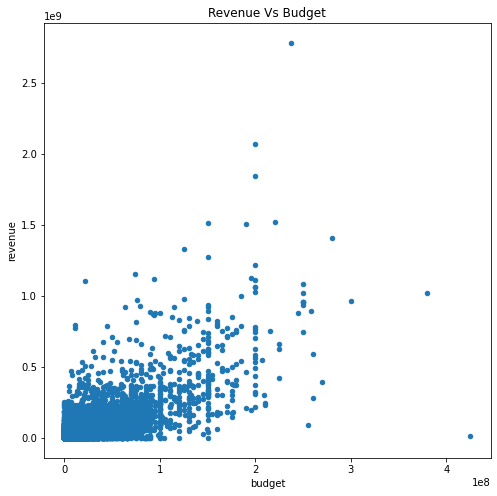

In [184]:
### Relationship between Budget and Revenue
df.plot(x='budget', y='revenue', title='Revenue Vs Budget', kind='scatter', figsize=(8,8));

From the relationship above, it is obvious that revenue vs budget are not linear, hence the budget of the move is not totally proportinal to the revenue generated. 

<a id='conclusions'></a>
## Conclusions

From the few analysis, we can observe that Budget doest not linearly affect revenue though there are some element of truth in it but it is dispersly scattered. Also we notice that Drama, comedy, thriller and Action are more common features in the genre and occupies more the half of the count in the genres. we can see that popularity affects revenue, the higher the popularity of the movie, the more the revnue generated. 


### Limitations encountered in this project

I have used TMBD Movies dataset for my analysis and worked with popularity, revenue, budget and genre. Our analysis is limited to only the provided dataset. For example, the dataset does not confirm that every release of every director and cast is listed, there is a significant nul values that will afffect the result if analysed against the effect on revenue and budget. Dropping missing or Null values from variables of our interest might skew our analysis and could show unintentional bias towards the relationship being analyzed.
There is no normalization or exchange rate or currency conversion is considered during this analysis and our analysis is limited to the numerical values of revenue.